## Welcome to your notebook.


#### Run this cell to connect to your GIS and get started:

In [1]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:597: UserWarning: You are logged on as sxc200036@utdallas.edu_UTDEPPS with an administrator role, proceed with caution.
  warnings.warn(


#### Now you are ready to start!

In [2]:
m1 = gis.map("Fort Worth, TX")
m1

MapView(layout=Layout(height='400px', width='100%'))

In [3]:
m1.basemaps

['dark-gray',
 'dark-gray-vector',
 'gray',
 'gray-vector',
 'hybrid',
 'national-geographic',
 'oceans',
 'osm',
 'satellite',
 'streets',
 'streets-navigation-vector',
 'streets-night-vector',
 'streets-relief-vector',
 'streets-vector',
 'terrain',
 'topo',
 'topo-vector']

In [4]:
m1.basemap = "satellite"

In [5]:
m2 = gis.map("United States")
m2

MapView(layout=Layout(height='400px', width='100%'))

In [6]:
flayer_search_result = gis.content.search(query="owner:CSSE_covid19(Johns Hopkins)", outside_org=True)
flayer_search_result

[<Item title:"Coronavirus COVID-19 (2019-nCoV)" type:Dashboard owner:CSSE_covid19>,
 <Item title:"COVID-19 Cases US" type:Feature Layer Collection owner:CSSE_covid19>,
 <Item title:"Dashboard Coronavirus COVID-19 (Mobile)" type:Dashboard owner:CSSE_covid19>,
 <Item title:"Coronavirus COVID-19 Cases V2" type:Feature Layer Collection owner:CSSE_covid19>,
 <Item title:"Coronavirus COVID-19 Cases" type:Feature Layer Collection owner:CSSE_covid19>,
 <Item title:"Test_COVID-19-Copy" type:Web Map owner:CSSE_covid19>,
 <Item title:"cases_time_v3" type:Table Layer owner:CSSE_covid19>,
 <Item title:"Test_COVID-19-Existing Cases-Copy" type:Web Map owner:CSSE_covid19>]

In [7]:
from arcgis.features import FeatureLayer

In [8]:
flayer = flayer_search_result[1].layers[0]
flayer

<FeatureLayer url:"https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases_US/FeatureServer/0">

In [9]:
# Loop through feature layer fields (properties.fields) and print
for f in flayer.properties.fields:
    print(f.name)

OBJECTID
Province_State
Country_Region
Last_Update
Lat
Long_
Confirmed
Recovered
Deaths
Active
Admin2
FIPS
Combined_Key
Incident_Rate
People_Tested
People_Hospitalized
UID
ISO3


In [10]:
# Add to above map
m2.add_layer(flayer)


In [11]:
m3 = gis.map("Texas")
m3

MapView(layout=Layout(height='400px', width='100%'))

In [12]:
# Just get Texas data (Province_State='Texas')
TX_layer = flayer.query("Province_State='Texas'")
TX_layer

<FeatureSet> 255 features

In [13]:
m3.add_layer(TX_layer, {"renderer":"ClassedSizeRenderer", "field_name": "Deaths"})


# JUST GRAD PART:


In [16]:
data_path = ("home")


In [20]:
import pandas as pd
from arcgis.features import GeoAccessor


In [21]:
# read parcels.csv into a DataFrame
df_parcels = pd.read_csv('/arcgis/home/parcels(1).csv')
# based on the columns of x and y, transform the dataframe to be a spatial DataFrame
sedf = GeoAccessor.from_xy(df_parcels, 'x','y')
# simply show data 
sedf.spatial.plot()


MapView(layout=Layout(height='400px', width='100%'))

In [51]:
#houses below 500k
df_parcels_fil_lt500 = df_parcels[df_parcels['market_value'] < 500000]

In [53]:
#houses above 500k
df_parcels_fil_gt500 = df_parcels[df_parcels['market_value'] > 500000]

In [22]:
sedf.spatial.plot(map_widget=m3,
                renderer_type='u',
                method='esriClassifyNaturalBreaks',
                class_count=5,
                col='CAMPNAME', 
                cmap='gnuplot2_r',
                alpha=0.7)

True

In [25]:
# Turn on map legend
m3.legend = True

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Count of Houses')

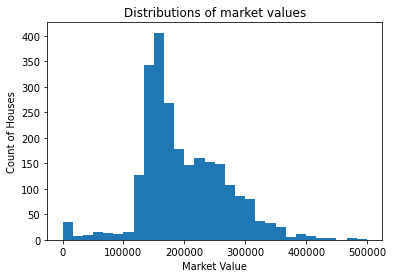

In [52]:
# Create a histogram with 30 bins for houses below 500k
df_parcels_fil_lt500.market_value.plot.hist(bins = 30)
# Set title
plt.title("Distributions of market values")
# Set axis labels
plt.xlabel("Market Value")
plt.ylabel("Count of Houses")

Text(0, 0.5, 'Count of Houses')

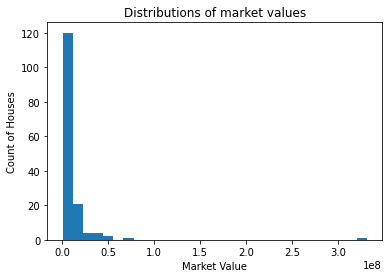

In [54]:
# Create a histogram with 30 bins for houses above 500k
df_parcels_fil_gt500.market_value.plot.hist(bins = 30)
# Set title
plt.title("Distributions of market values")
# Set axis labels
plt.xlabel("Market Value")
plt.ylabel("Count of Houses")

In [34]:
m4 = gis.map("Richardson, TX", zoomlevel=15)
m4

MapView(layout=Layout(height='400px', width='100%'))

In [35]:
# A new webmap of parcels colored by market value, using class breaks renderer with esriClassifyNaturalBreaks classification and 7 classes, YlGnBu color map, dark-gray basemaap, and showing a legend
sedf.spatial.plot(map_widget=m4,
                renderer_type='c',
                method='esriClassifyNaturalBreaks',
                class_count=7,
                col='market_value', 
                cmap='YlGnBu',
                basemap='dark-gray')


True

In [36]:
m4.legend = True

In [ ]:
m4 = gis.map("Richardson, TX", zoomlevel=4)
m4

In [ ]:
# A new webmap of parcels colored by market value, using class breaks renderer with esriClassifyNaturalBreaks classification and 7 classes, YlGnBu color map, dark-gray basemaap, and showing a legend
sedf.spatial.plot(map_widget=m4,
                renderer_type='c',
                method='esriClassifyNaturalBreaks',
                class_count=7,
                col='market_value', 
                cmap='YlGnBu',
                basemap='dark-gray')

In [ ]:
m5.legend = True